<a href="https://colab.research.google.com/github/Nisasoylu/GNN/blob/main/Introduction_to_NetworkX_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

False
False


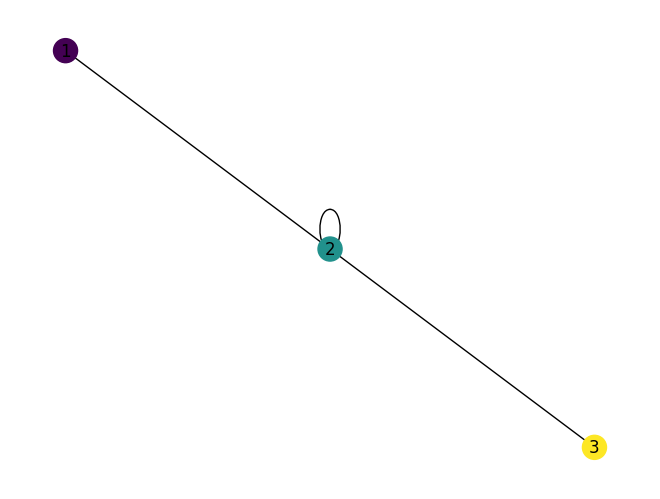

In [49]:
graph1 = nx.Graph()
graph1.add_edge(1,2)
graph1.add_edge(3,2)
graph1.add_edge(2,2)

nx.draw(graph1, node_color = graph1, with_labels = True)
print(nx.is_weighted(graph1))
print(nx.is_directed(graph1))

In [50]:
adj_matrix1 = nx.adjacency_matrix(graph1)
adj_matrix1 = adj_matrix1.todense()
print(adj_matrix1)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


False
False


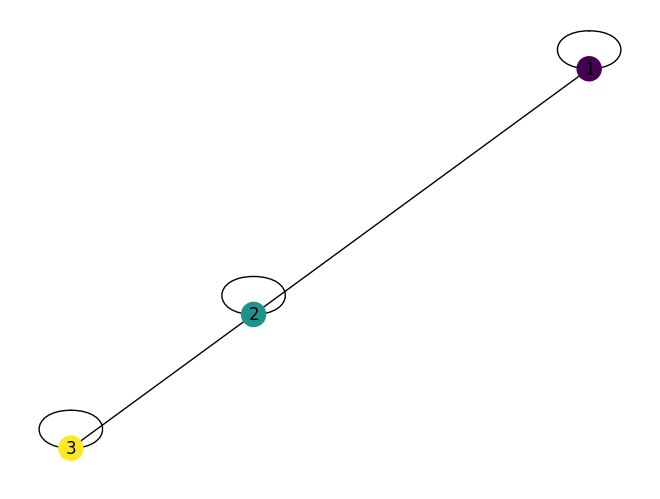

In [51]:
graph2 = nx.Graph()
graph2.add_edge(1,2)
graph2.add_edge(3,2, weight = 5)
graph2.add_edge(2,2)

graph2.add_edge(1,1)
graph2.add_edge(2,2)
graph2.add_edge(3,3)

nx.draw(graph2, node_color = graph2, with_labels = True)

print(nx.is_weighted(graph2))
print(nx.is_directed(graph2))

In [52]:
adj_matrix2 = nx.adjacency_matrix(graph2)
adj_matrix2 = adj_matrix2.todense()
print(adj_matrix2)

[[1 1 0]
 [1 1 5]
 [0 5 1]]


Here, although some nodes have some weights, the graph in general is not accepted as weighted graph. If you would want to create the weighted graph, you need to make sure that weights are defined to all the node.

True
False
[[12  5  0]
 [ 5 60  2]
 [ 0  2 20]]


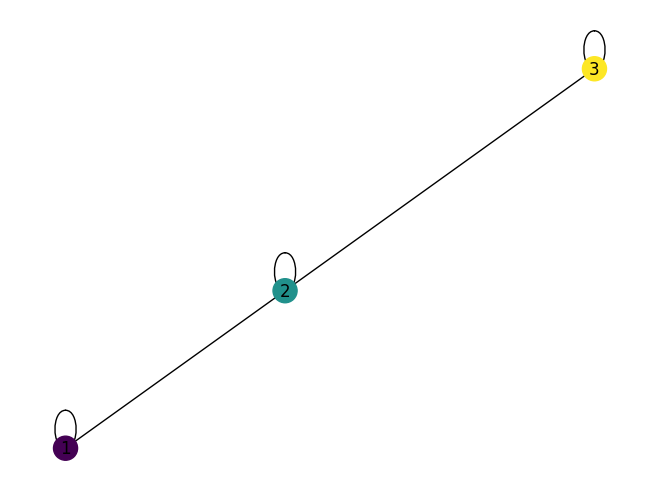

In [53]:
graph3 = nx.Graph()
graph3.add_edge(1,2, weight = 5)
graph3.add_edge(3,2, weight = 2)
graph3.add_edge(2,2, weight = 7)

graph3.add_edge(1,1, weight = 12)
graph3.add_edge(2,2, weight = 60)
graph3.add_edge(3,3, weight = 20)

nx.draw(graph3, node_color = graph3, with_labels = True)

print(nx.is_weighted(graph3))
print(nx.is_directed(graph3))

adj_matrix3 = nx.adjacency_matrix(graph3)
adj_matrix3 = adj_matrix3.todense()
print(adj_matrix3)

In [54]:
I3 = nx.incidence_matrix(graph3)
I3 = I3.todense()
print(I3)

[[1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [55]:
adj_matrix3.diagonal()

array([12, 60, 20])

In [60]:
# Laplacian matrix (L) = D (Degree matrix) - A ( Adjacency matrix)
L = nx.laplacian_matrix(graph3)
L = L.todense()
print(L)

[[ 5 -5  0]
 [-5  7 -2]
 [ 0 -2  2]]


Grouping the nodes:

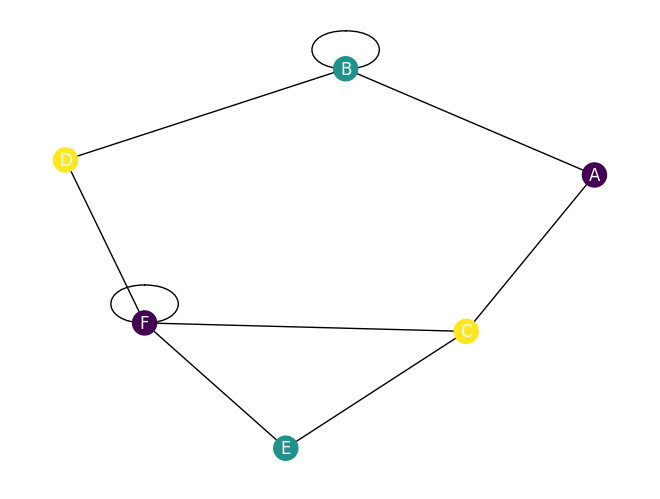

In [74]:
graph4 = nx.Graph()
graph4.add_edges_from( [("A", "B"), ("A", "C"), ("B", "D"), ("C", "E"), ("C", "F"),
                        ("E", "F"), ("D", "F"), ("B", "B"), ("F", "F")])

val_map = {"A":1.0, "B":2.0, "C":3.0, "D":3.0, "E":2.0, "F":1.0}
values = [val_map.get(node) for node in graph4.nodes()]

nx.draw(graph4, node_color = values, with_labels = True, font_color = "white") # Undirected version
# So, we created some classes:

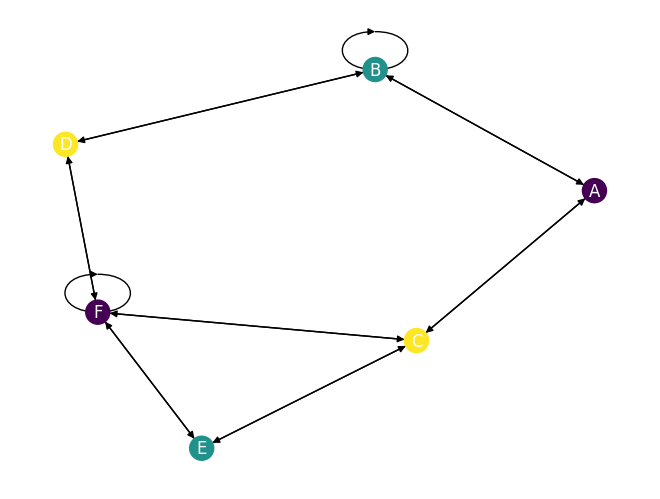

In [75]:
nx.draw(graph4.to_directed(), node_color = values, with_labels = True, font_color = "white") # Directed version

In [76]:
I4 = nx.incidence_matrix(graph4)
I4 = I4.todense()
print(I4)

[[1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0.]]


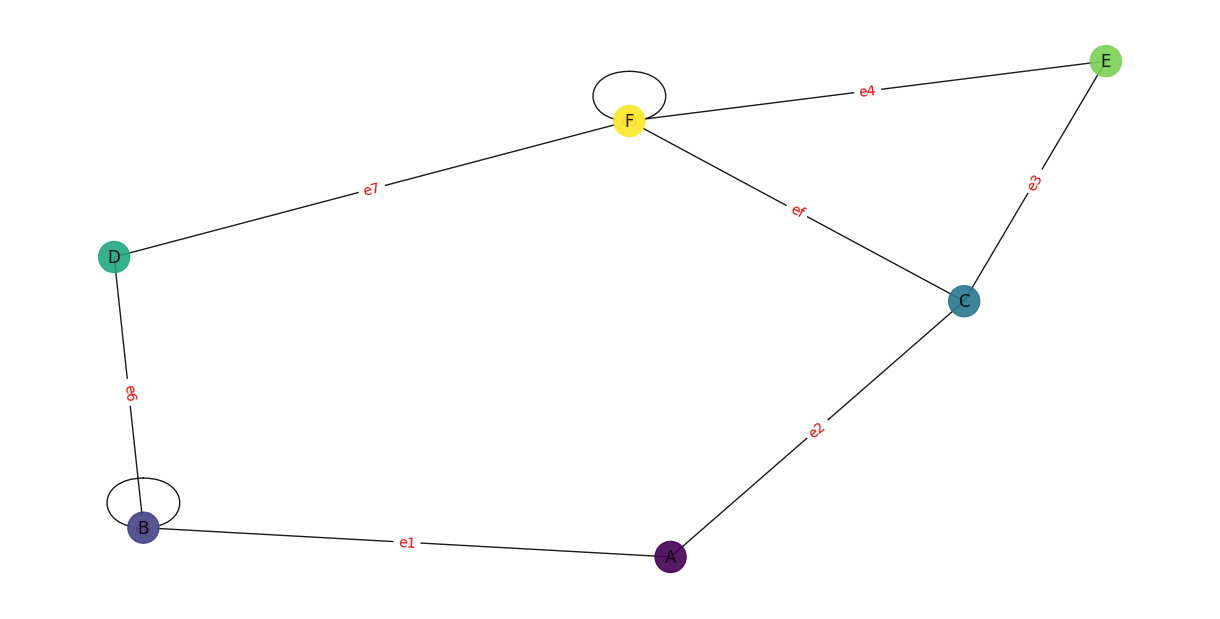

False
False
9
6


In [78]:
edge_labels = {("A", "B"): "e1", ("A", "C"): "e2", ("C", "E"): "e3", ("E", "F"): "e4", ("C", "F"): "ef", ("B", "D"): "e6", ("D", "F"): "e7", ("B", "B"): "e8", ("F", "F"): "e9"}
all_edges = [("A", "B"), ("A", "C"), ("B", "D"), ("C", "E"), ("C", "F"), ("E", "F"), ("D", "F"), ("B", "B"), ("F", "F")]

G = nx.Graph()
G.add_edges_from(all_edges)

val_map = {"A": 1.0, "B": 2.0, "C": 3.0, "D": 4.0, "E": 5.0, "F": 6.0}
values = [val_map.get(node, 0.25) for node in G.nodes()]

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 6))
nx.draw(G, pos, edge_color="black", width=1, linewidths=1, node_size=500, node_color=values, alpha=0.9, labels={node: node for node in G.nodes()})
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")
plt.axis("off")
plt.show()
print(nx.is_weighted(G))
print(nx.is_directed(G))
print(G.number_of_edges())
print(G.number_of_nodes())

In [80]:
# List of adjacent nodes:

def get_adjanct_list_with_all_edges(graph_val):
    for s, neighbors in graph_val.adjacency():
        line = str(s) + " : "
        for t, data in neighbors.items():
            line += str(t) + " - "
        yield line[: -len(" ")]

for line in get_adjanct_list_with_all_edges(G):
    print(line)

A : B - C -
B : A - D - B -
C : A - E - F -
D : B - F -
E : C - F -
F : C - E - D - F -


In [82]:
# Node degree:
print(G.degree())

[('A', 2), ('B', 4), ('C', 3), ('D', 2), ('E', 2), ('F', 5)]


In [83]:
L = nx.laplacian_matrix(G)
L = L.todense()
print(L)

[[ 2 -1 -1  0  0  0]
 [-1  2  0 -1  0  0]
 [-1  0  3  0 -1 -1]
 [ 0 -1  0  2  0 -1]
 [ 0  0 -1  0  2 -1]
 [ 0  0 -1 -1 -1  3]]
